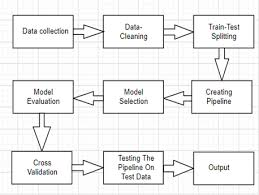

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from geopy.geocoders import Nominatim

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from eli5.sklearn import PermutationImportance
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score

In [2]:
df1 = pd.read_csv('data/Bangalore.csv')
df2 = pd.read_csv('data/Delhi.csv')
df3 = pd.read_csv('data/Chennai.csv')
df4 = pd.read_csv('data/Hyderabad.csv')
df5 = pd.read_csv('data/Mumbai.csv')
df6 = pd.read_csv('data/Kolkata.csv')

In [3]:
df1.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [4]:
df2.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,10500000,1200,Sector 10 Dwarka,2,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
1,6000000,1000,Uttam Nagar,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15000000,1350,Sarita Vihar,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2500000,435,Uttam Nagar,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,5800000,900,Dwarka Mor,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
df3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,5500000,1310,Perungalathur,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5350000,1126,Madhavaram,2,0,0,1,1,1,0,...,1,0,0,0,0,0,0,0,0,0
2,8205000,1307,Karapakkam,3,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,23400000,3600,Thiruvidandhai,3,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,10100000,1700,Iyappanthangal,3,0,0,1,1,1,1,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df4.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
df1.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,6.207000e+03,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,...,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000,6207.000000
mean,1.058510e+07,1526.094248,2.556952,0.078782,6.208797,6.461576,6.436121,6.382471,6.396649,6.373933,...,6.438537,6.211052,6.311100,6.210569,6.181569,6.210569,6.210569,6.210569,6.171097,6.210569
std,1.410943e+07,764.845609,0.694300,0.269420,4.126883,3.752421,3.792567,3.875271,3.853661,3.888204,...,3.788782,4.123761,3.981513,4.124430,4.164294,4.124430,4.124430,4.124430,4.178546,4.124430
min,2.000000e+06,415.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+06,1110.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.368000e+06,1340.000000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,1.070000e+07,1662.500000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,3.000000e+08,9900.000000,7.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


Most amenities have the value 9 to denote missing values. We will drop those values to make our analysis accurate.

In [8]:
df1.replace(9, np.nan, inplace=True)
df2.replace(9, np.nan, inplace=True)
df3.replace(9, np.nan, inplace=True)
df4.replace(9, np.nan, inplace=True)
df5.replace(9, np.nan, inplace=True)
df6.replace(9, np.nan, inplace=True)

In [9]:
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
df5 = df3.dropna()
df6 = df4.dropna()

## Checking the shape of the dataset after dropping values

In [10]:
print(f"Bangalore:{df1.shape}\n")
print(f"Delhi:{df2.shape}\n")
print(f"Chennai:{df3.shape}\n")
print(f"Hyderabad:{df4.shape}\n")
print(f"Mumbai:{df5.shape}\n")
print(f"Kolkata:{df6.shape}\n")


Bangalore:(1951, 40)

Delhi:(2002, 40)

Chennai:(2233, 40)

Hyderabad:(2434, 40)

Mumbai:(2233, 40)

Kolkata:(2434, 40)



## Checking datatypes in the dataset

In [11]:
df1.dtypes

Price                    int64
Area                     int64
Location                object
No. of Bedrooms          int64
Resale                   int64
MaintenanceStaff       float64
Gymnasium              float64
SwimmingPool           float64
LandscapedGardens      float64
JoggingTrack           float64
RainWaterHarvesting    float64
IndoorGames            float64
ShoppingMall           float64
Intercom               float64
SportsFacility         float64
ATM                    float64
ClubHouse              float64
School                 float64
24X7Security           float64
PowerBackup            float64
CarParking             float64
StaffQuarter           float64
Cafeteria              float64
MultipurposeRoom       float64
Hospital               float64
WashingMachine         float64
Gasconnection          float64
AC                     float64
Wifi                   float64
Children'splayarea     float64
LiftAvailable          float64
BED                    float64
VaastuCo

Changing price so it is denoted in Lakhs

In [12]:
df1['Price'] = df1['Price']/100000
df2['Price'] = df2['Price']/100000
df3['Price'] = df3['Price']/100000
df4['Price'] = df4['Price']/100000
df5['Price'] = df5['Price']/100000
df6['Price'] = df6['Price']/100000

In [13]:
df3.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,55.00,1310,Perungalathur,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,53.50,1126,Madhavaram,2,0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,82.05,1307,Karapakkam,3,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,234.00,3600,Thiruvidandhai,3,0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,101.00,1700,Iyappanthangal,3,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Color Scheme/Palette

In [14]:
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372", "#00FF00", "#800080"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

Bangalore


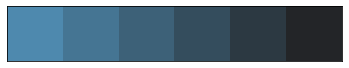

In [15]:
bangalore = sns.dark_palette(custom_colors[0], reverse=True)
sns.palplot(sns.color_palette(bangalore),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Bangalore")

Delhi


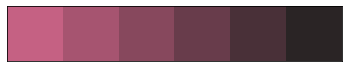

In [16]:
delhi = sns.dark_palette(custom_colors[1], reverse=True)
sns.palplot(sns.color_palette(delhi),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Delhi")

Chennai


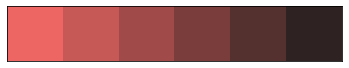

In [17]:
chennai = sns.dark_palette(custom_colors[2], reverse=True)
sns.palplot(sns.color_palette(chennai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Chennai")

Hyderabad


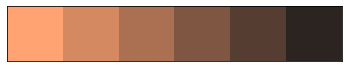

In [18]:
hyd = sns.dark_palette(custom_colors[3], reverse=True)
sns.palplot(sns.color_palette(hyd),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Hyderabad")

Mumbai


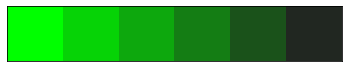

In [19]:
mumbai = sns.dark_palette(custom_colors[4], reverse=True)
sns.palplot(sns.color_palette(mumbai),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Mumbai")

Kolkata


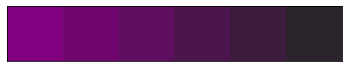

In [20]:
kolkata = sns.dark_palette(custom_colors[5], reverse=True)
sns.palplot(sns.color_palette(kolkata),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)
print("Kolkata")

# Exploratory Data Analysis

In [21]:
def count_plot(data,title,p):
    df5=data[data['Resale']== 0]
    df6=data[data['Resale']== 1]
    fig, ax = plt.subplots(1,2,figsize=(15, 10))
    ax[0]=sns.countplot(y='Location', data=df5, order=df5.Location.value_counts().index[:10],ax=ax[0],palette = p)
    ax[0].set_title('Number of New Properties')
    ax[1]=sns.countplot(y='Location', data=df6, order=df6.Location.value_counts().index[:10],ax=ax[1],palette = p)
    ax[1].set_title('Number of Resale Properties')   
    
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(pad=3.0)
    plt.show()

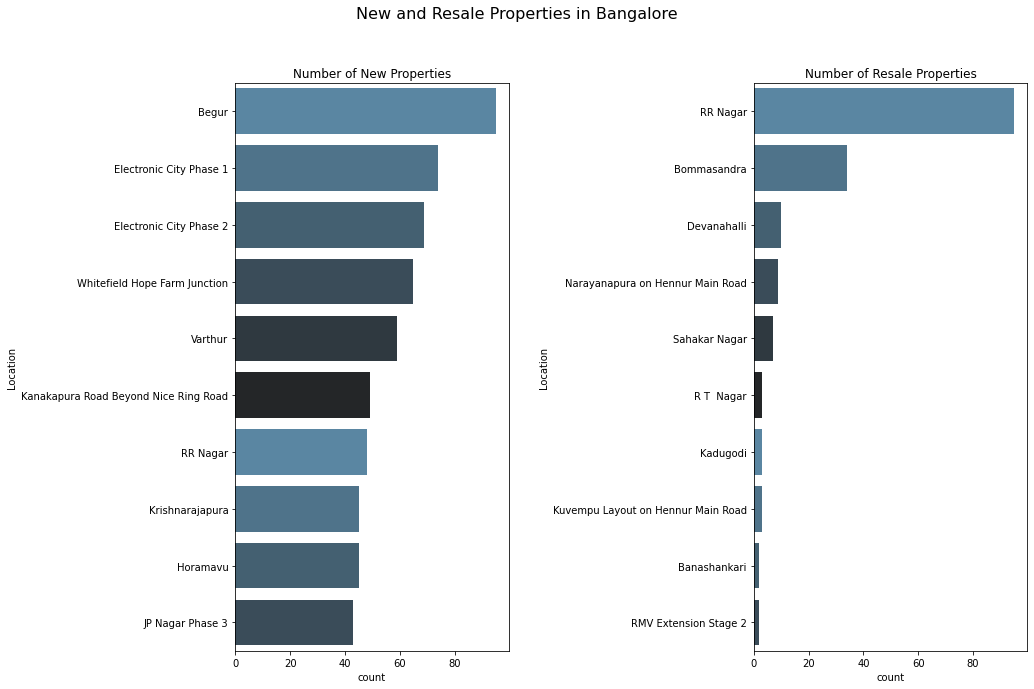

In [22]:
count_plot(df1,'New and Resale Properties in Bangalore', bangalore)

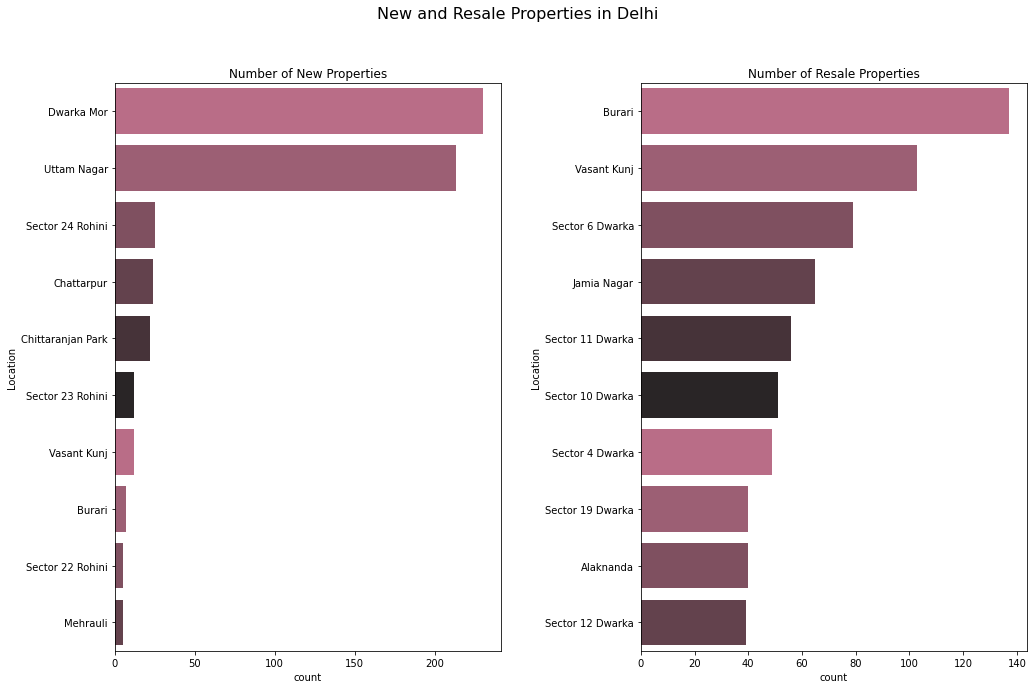

In [23]:
count_plot(df2,'New and Resale Properties in Delhi', delhi)

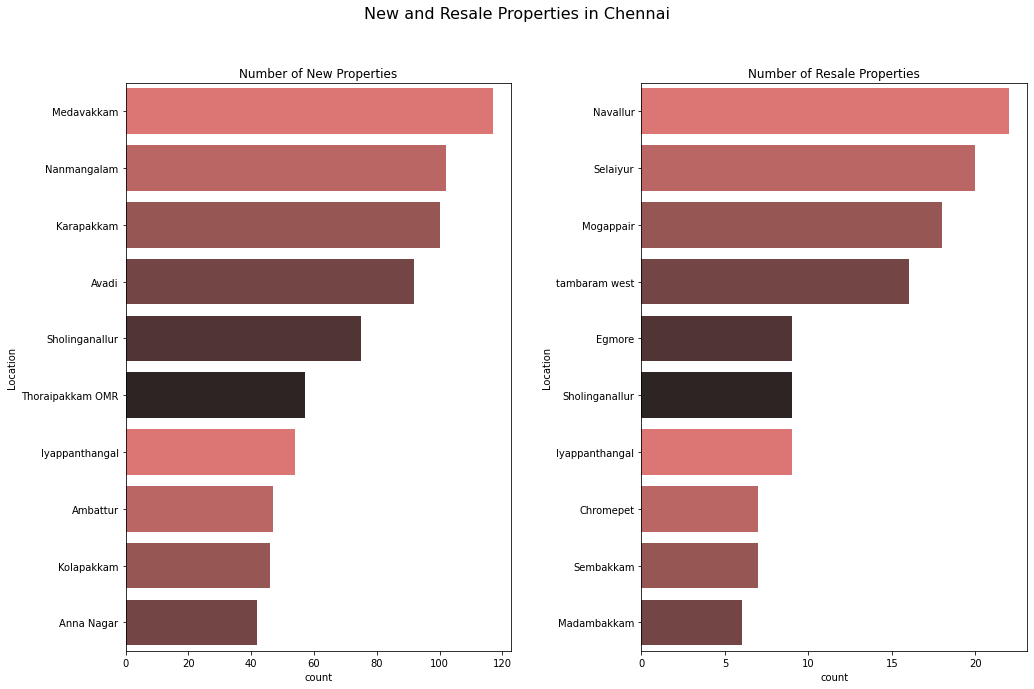

In [24]:
count_plot(df3,'New and Resale Properties in Chennai', chennai)

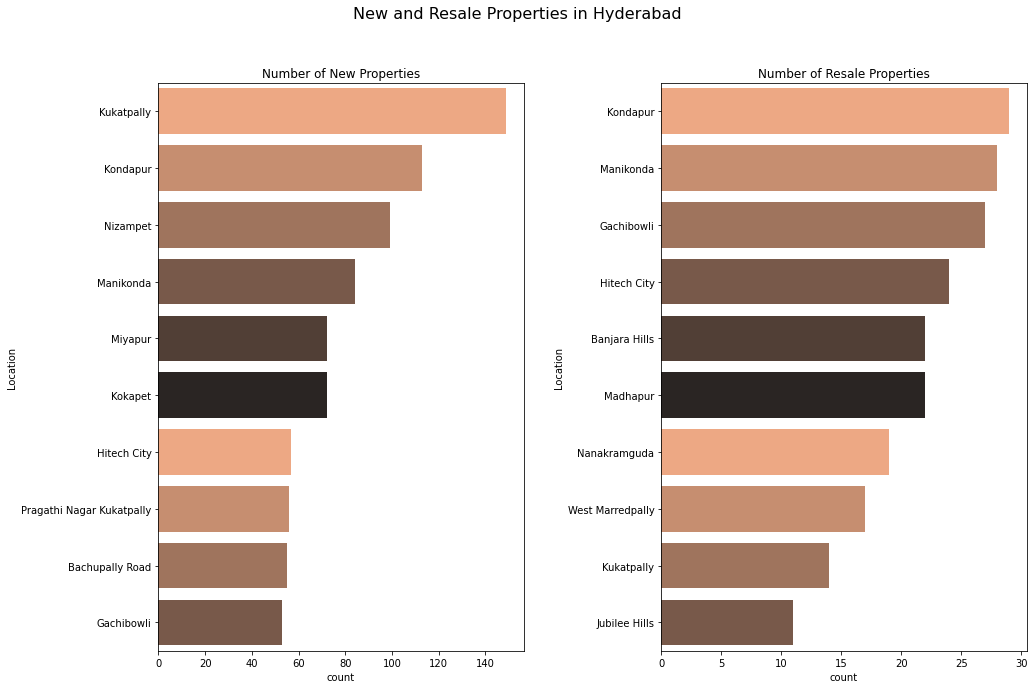

In [25]:
count_plot(df4,'New and Resale Properties in Hyderabad', hyd)

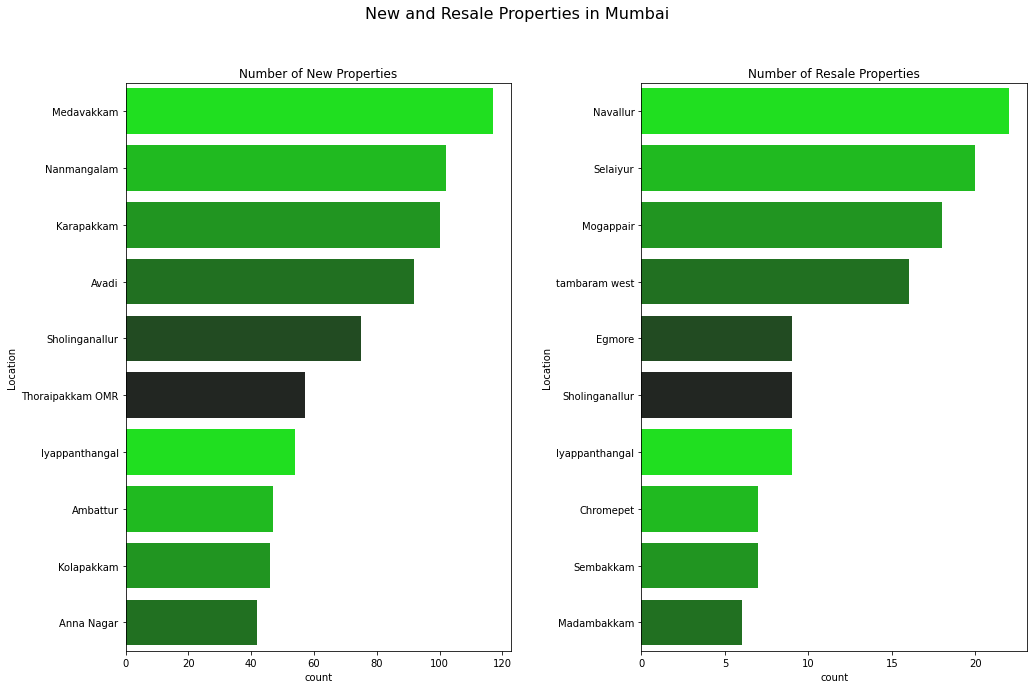

In [26]:
count_plot(df5,'New and Resale Properties in Mumbai', mumbai)

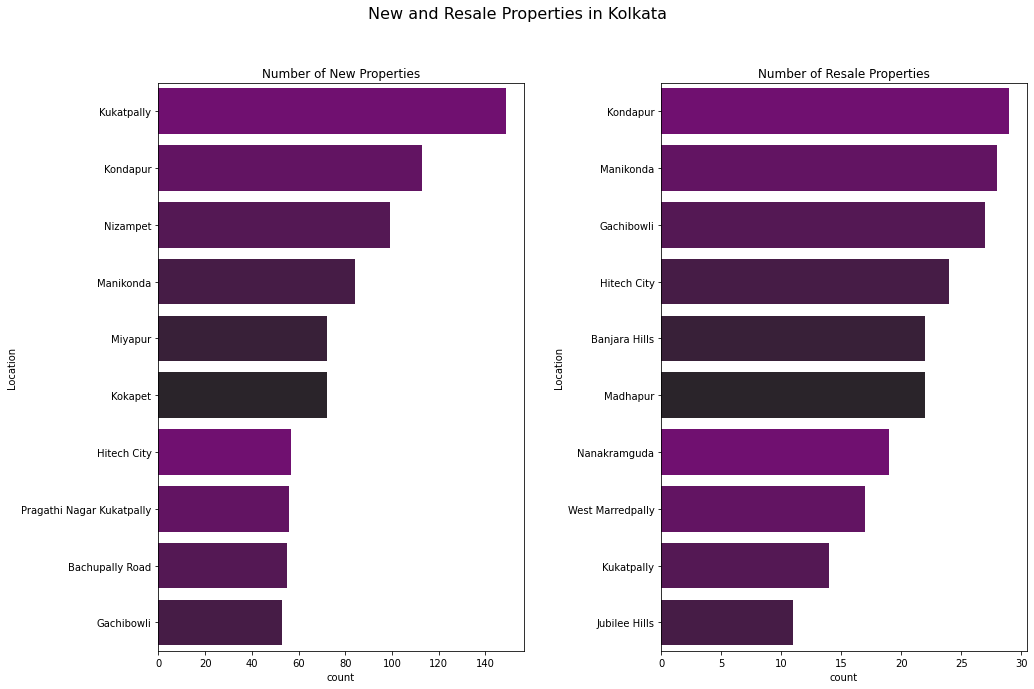

In [27]:
count_plot(df6,'New and Resale Properties in Kolkata', kolkata)

In [28]:
def cat_plot(data,title,p):
    sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
    plt.title('No. of Bedrooms vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


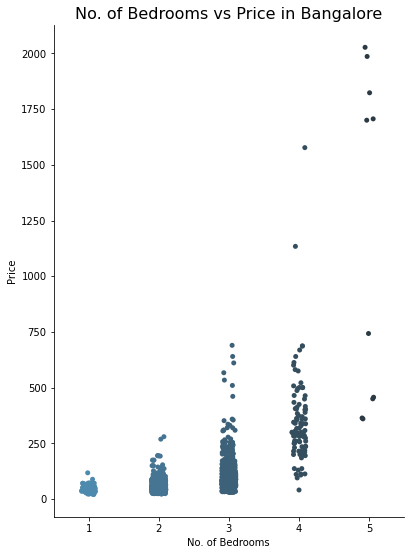

In [29]:
cat_plot(df1,'Bangalore',bangalore)

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


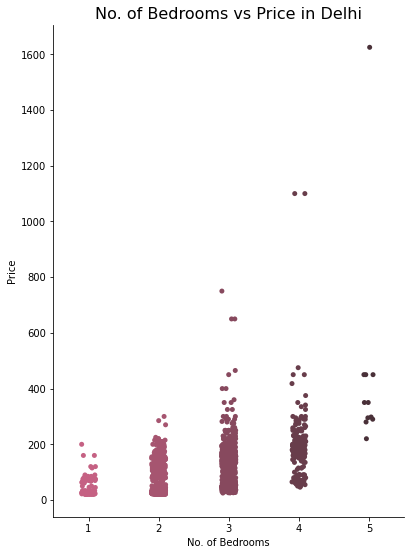

In [30]:
cat_plot(df2,'Delhi',delhi)

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


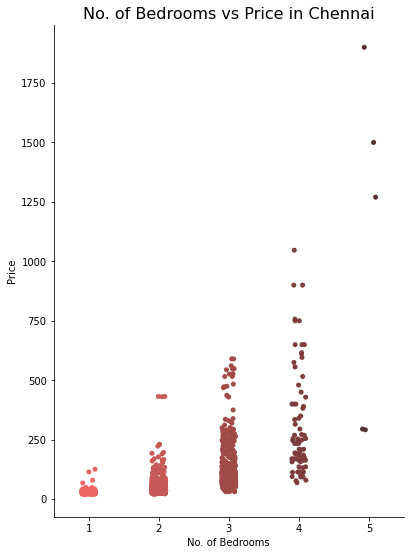

In [31]:
cat_plot(df3,'Chennai',chennai)

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


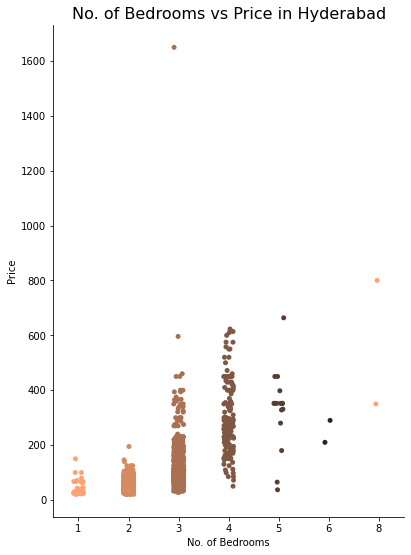

In [32]:
cat_plot(df4,'Hyderabad',hyd)

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


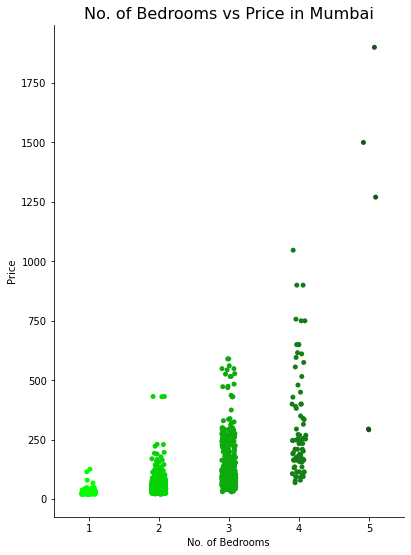

In [33]:
cat_plot(df5,'Mumbai',mumbai)

C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)
C:\Users\Manav\AppData\Local\Temp\ipykernel_37040\3142569856.py:2: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="No. of Bedrooms", y="Price", data=data,palette = p)


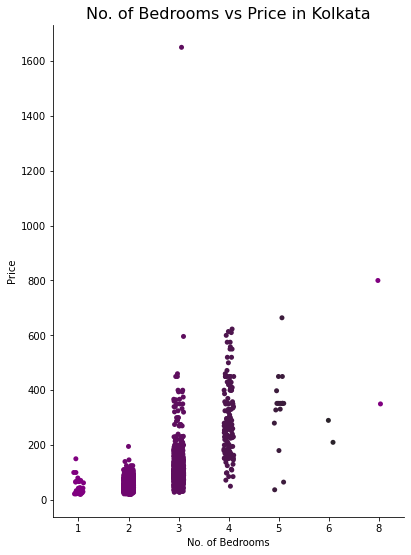

In [34]:
cat_plot(df6,'Kolkata', kolkata)

In [35]:
def scatter_plot(data,title,c):
    sns.scatterplot(x="Area", y="Price", data=data,color=c,marker="P")
    plt.title('Area in square feet vs Price in '+ title,size=16)
    plt.gcf().set_size_inches(6,8)
    plt.show()

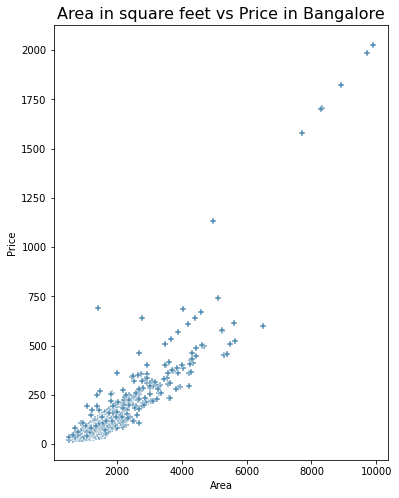

In [36]:
scatter_plot(df1,'Bangalore',custom_colors[0])

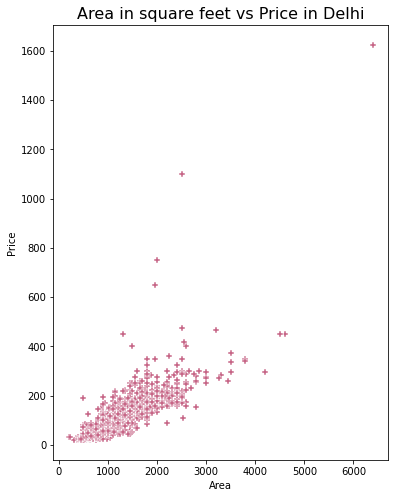

In [37]:
scatter_plot(df2,'Delhi',custom_colors[1])

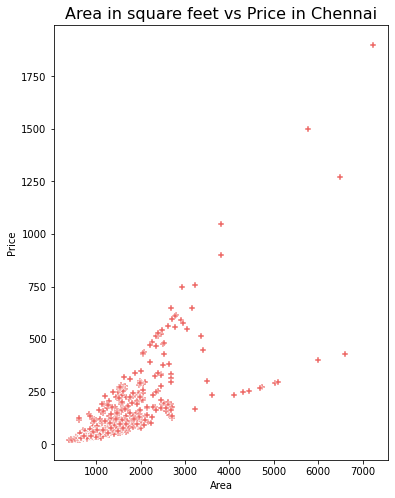

In [38]:
scatter_plot(df3,'Chennai',custom_colors[2])

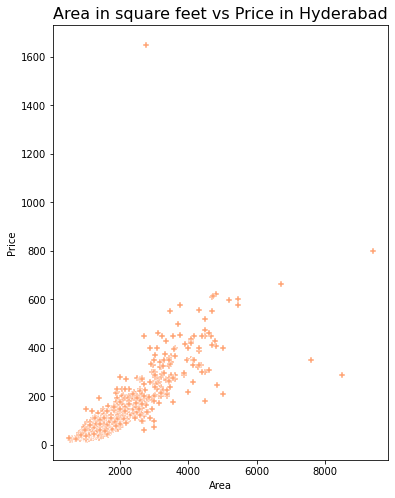

In [39]:
scatter_plot(df4,'Hyderabad',custom_colors[3])

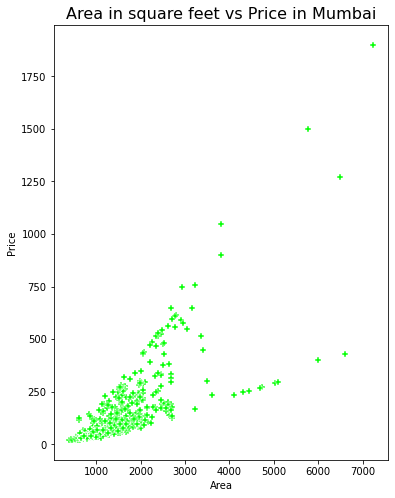

In [40]:
scatter_plot(df5,'Mumbai',custom_colors[4])

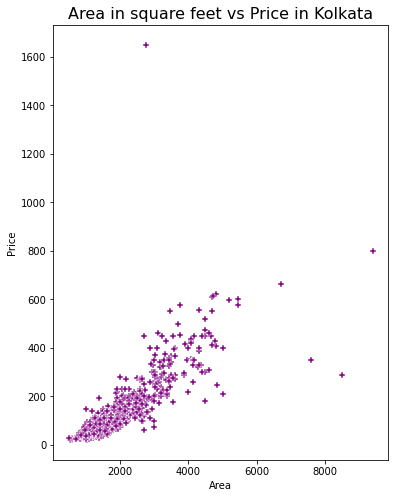

In [41]:
scatter_plot(df6,'Kolkata',custom_colors[5])

# Data Preprocessing

In [42]:
frames = [df1,df2,df3,df4,df5,df6]
merged = pd.concat(frames)

In [73]:
merged.columns
merged = merged.rename(columns={"Children'splayarea": "ChildrenPlayArea"})
merged = merged.dropna()
merged = merged.reset_index(drop=True)
merged

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,300.00,3340,JP Nagar Phase 1,4,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,78.88,1045,Dasarahalli on Tumkur Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,48.66,1179,Kannur on Thanisandra Main Road,2,0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,83.58,1675,Doddanekundi,3,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,68.45,1670,Kengeri,3,0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13282,45.00,1250,Kollur Road,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13283,35.03,1001,Miyapur,2,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13284,56.00,1551,chandrayangutta,3,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13285,75.00,3000,Jubilee Hills,3,1,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


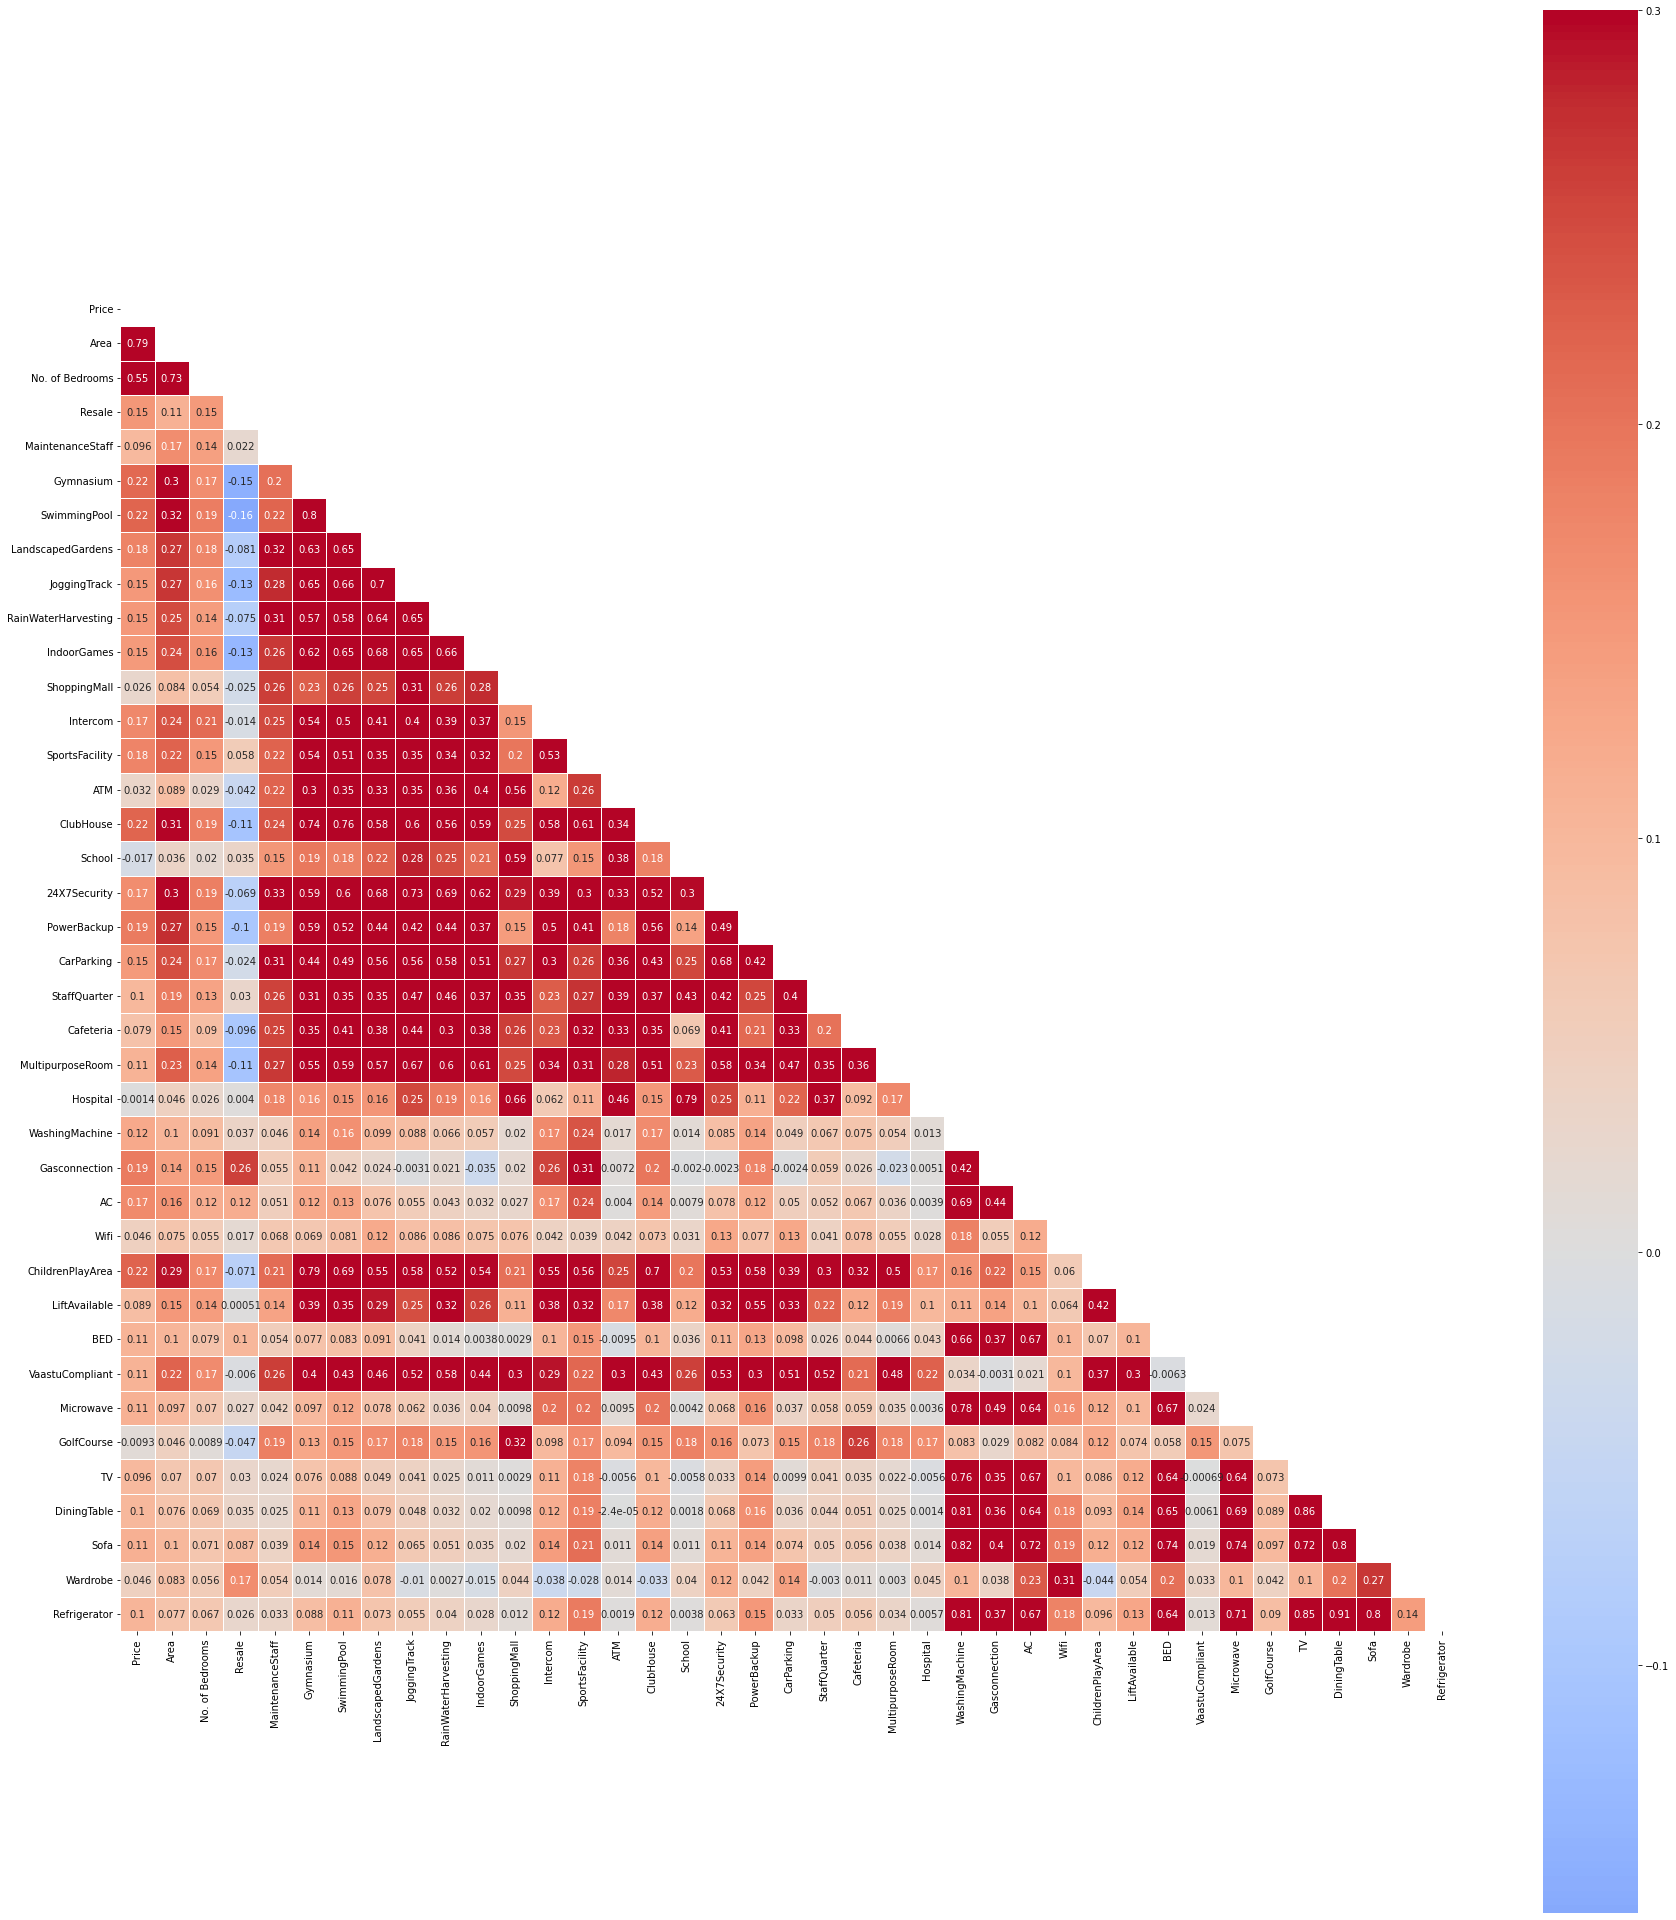

In [44]:
plt.figure(figsize=(30,35))
corr=merged.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(merged.corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [45]:
feature_names = ['Area','No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'ChildrenPlayArea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']

#can add Latitude Longitude later

X = merged[feature_names]
y = merged['Price']

In [46]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
model = RandomForestRegressor().fit(train_X, train_y)

In [47]:
perm = PermutationImportance(model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
1.2327 ± 0.0500,Area
0.0336 ± 0.0058,Resale
0.0312 ± 0.0034,Gasconnection
0.0307 ± 0.0076,RainWaterHarvesting
0.0274 ± 0.0184,Intercom
0.0244 ± 0.0040,No. of Bedrooms
0.0219 ± 0.0050,LiftAvailable
0.0184 ± 0.0031,24X7Security
0.0112 ± 0.0035,CarParking
0.0111 ± 0.0041,ChildrenPlayArea


# Feature Importance

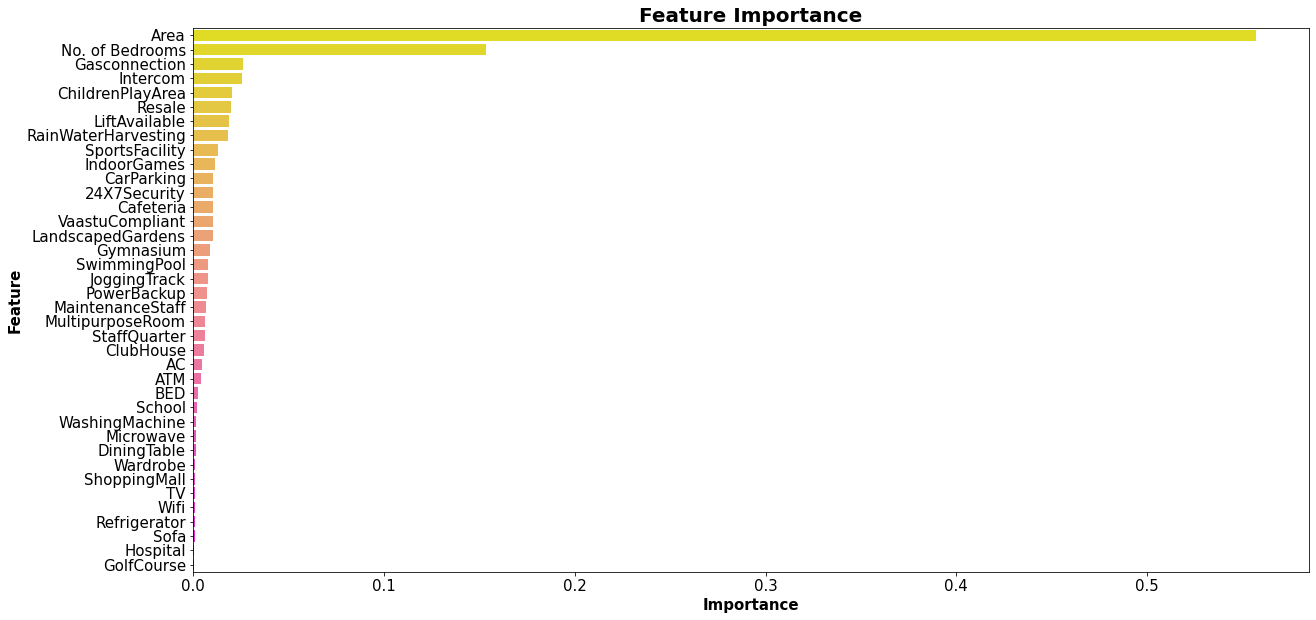

In [48]:
model3 = ExtraTreesRegressor()
model3.fit(train_X, train_y)
fi = pd.DataFrame(model3.feature_importances_,
             columns=['importance'])
fi['feature'] = feature_names
fi = fi.sort_values('importance', ascending=False)

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=fi, x='importance', y='feature',
                 palette="spring_r")
ax.tick_params(axis='both', which='both', labelsize=15)
ax.set_xlabel('Importance',fontsize=15, weight="bold");
ax.set_ylabel('Feature',fontsize=15,weight="bold");
plt.title("Feature Importance", size=20, weight="bold");

In [51]:
# feature_names = ['Area','IndoorGames','JoggingTrack','Resale','SportsFacility','VaastuCompliant']
feature_names = ['Area', 'Resale', 'Gasconnection', 'RainWaterHarvesting', 'Intercom', 
                 'No. of Bedrooms', 'LiftAvailable', '24X7Security', 'CarParking', 
                 'ChildrenPlayArea', 'Gymnasium', 'VaastuCompliant']

#can add latitude and longitude 

X = merged[feature_names]
y = merged['Price']

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [54]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

def train_model(m, name, params=None):
    if params:
        grid_search = GridSearchCV(m, params, cv=3, n_jobs=-1, scoring='neg_mean_absolute_error')
        grid_search.fit(train_X, train_y)
        model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        model = m
        best_params = None
    model.fit(X=train_X, y=train_y)
    predictions = model.predict(val_X)
    mae = mean_absolute_error(val_y, predictions)
    r2 = r2_score(val_y, predictions)
    print("{0} mae {1} r2 {2}".format(name, mae, r2))
    print("Best parameters:", best_params)
    
# Define hyperparameters for XGBoost Regressor with regularization
xgb_params = {
    'n_estimators': [100, 300, 600],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'alpha': [0, 0.1, 0.5],  # L1 regularization parameter
    'lambda': [0, 0.1, 0.5]   # L2 regularization parameter
}

dtr_params = {
    'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

train_model(DecisionTreeRegressor(), "Decision Tree Regressor", dtr_params)
train_model(RandomForestRegressor(), "Random Forest Regressor")
train_model(XGBRegressor(), "XGBoost Regressor", xgb_params)


Decision Tree Regressor mae 12.726723335252176 r2 0.8131342380496052
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Random Forest Regressor mae 15.317078703720036 r2 0.7964392144874792
Best parameters: None
XGBoost Regressor mae 15.962601242611843 r2 0.7502438724091791
Best parameters: {'alpha': 0, 'lambda': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 600}


In [58]:
final_model = DecisionTreeRegressor(max_depth=None, min_samples_split=2, min_samples_leaf=1)  # Replace with your best parameters
final_model.fit(X, y)

DecisionTreeRegressor()

In [69]:

unseen_data = pd.DataFrame({
    'Area': [1200, 1500, 1000],  # Example values for Area in square feet
    'Resale': [1, 0, 1],          # Example values for Resale (1 for resale available, 0 for not available)
    'Gasconnection': [0, 1, 1],   # Example values for Gasconnection (1 for available, 0 for not available)
    'RainWaterHarvesting': [1, 1, 0],  # Example values for RainWaterHarvesting
    'Intercom': [0, 1, 0],        # Example values for Intercom
    'No. of Bedrooms': [2, 3, 2], # Example values for No. of Bedrooms
    'LiftAvailable': [1, 1, 0],   # Example values for LiftAvailable
    '24X7Security': [1, 1, 0],    # Example values for 24X7Security
    'CarParking': [1, 1, 0],      # Example values for CarParking
    'ChildrenPlayArea': [1, 0, 1],# Example values for ChildrenPlayArea
    'Gymnasium': [1, 1, 0],       # Example values for Gymnasium
    'VaastuCompliant': [1, 0, 1]  # Example values for VaastuCompliant
})


predictions = final_model.predict(unseen_data)
predictions

array([ 52., 103.,  80.])